### Data Processing

In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Fetch intraday data for Apple Inc. (AAPL)
ticker = yf.Ticker("AAPL")
stock_data = ticker.history(period="1d", interval="1m")
stock_data = stock_data[['Close']]
stock_data.reset_index(inplace=True)

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Close']])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)


### Predict multiple-step forecast

In [23]:
sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50


/Users/Kevin/.conda/envs/dev/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.3207 - val_loss: 0.1275
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1026 - val_loss: 0.0064
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0209 - val_loss: 0.0606
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0468 - val_loss: 0.0119
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0111 - val_loss: 0.0099
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0173 - val_loss: 0.0140
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0195 - val_loss: 0.0082
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0113 - val_loss: 0.0069
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0084 - val_loss: 0.0116
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - val_loss: 0.0092
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - val_loss: 0.0058
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 13/50

#### Plot forecast

/var/folders/cr/wgr_cfzd63x5rjlv07yzf61c0000gn/T/ipykernel_92695/3503826414.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  future_dates = pd.date_range(start=stock_data['Datetime'].iloc[-1] + pd.Timedelta(minutes=1), periods=10, freq='T')


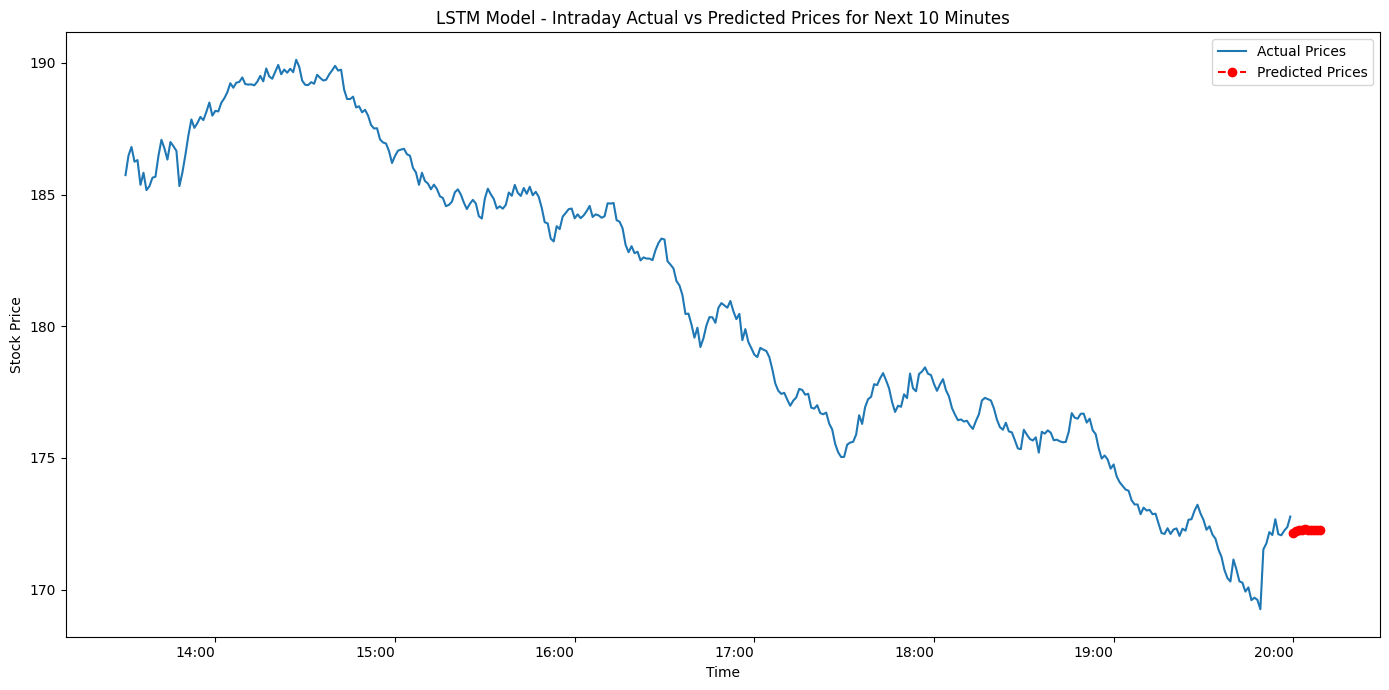

In [ ]:
# # Prepare data for prediction
# last_sequence = scaled_data[-sequence_length:]
# last_sequence = np.reshape(last_sequence, (1, sequence_length, 1))

# # Predict next 10 minutes
# predictions = []
# for _ in range(10):
#     next_price = model.predict(last_sequence)
#     predictions.append(next_price[0][0])
#     last_sequence = np.concatenate((last_sequence[:, 1:, :], np.reshape(next_price, (1, 1, 1))), axis=1)

# predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()

# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Generate future timestamps
# future_dates = pd.date_range(start=stock_data['Datetime'].iloc[-1] + pd.Timedelta(minutes=1), periods=10, freq='T')

# # Create DataFrame for predictions
# predictions_df = pd.DataFrame({
#     'Datetime': future_dates,
#     'Predicted': predictions
# })

# # Plot the results
# plt.figure(figsize=(14, 7))
# plt.plot(stock_data['Datetime'], stock_data['Close'], label='Actual Prices')
# plt.plot(predictions_df['Datetime'], predictions_df['Predicted'], color='red', marker='o', linestyle='--', label='Predicted Prices')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.title('LSTM Model - Intraday Actual vs Predicted Prices for Next 10 Minutes')
# plt.legend()

# # Format x-axis to show hours only
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
# plt.gcf().autofmt_xdate()  # Rotation

# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

#### Evaluate mae/rmse for 10-step prediction

In [30]:
# Evaluate model for 10-step prediction

from sklearn.metrics import mean_absolute_error, mean_squared_error

def create_multi_step_sequences(data, seq_length, prediction_horizon):
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_horizon + 1):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[(i + seq_length):(i + seq_length + prediction_horizon), 0])
    return np.array(X), np.array(y)

sequence_length = 10
horizon = 10
X, y = create_multi_step_sequences(scaled_data, sequence_length, horizon)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(25),
    Dense(horizon)  # Output layer now returns 10 values
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

predictions = model.predict(X_test, verbose=0)  # shape: (num_samples, 10)

# # Inverse transform both y_test and predictions
# predictions_unscaled = scaler.inverse_transform(predictions)
# y_test_unscaled = scaler.inverse_transform(y_test)

# Flatten arrays to compute overall MAE/RMSE across all predictions
mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predictions.flatten()))

print(f"10-step MAE: {mae:.4f}")
print(f"10-step RMSE: {rmse:.4f}")

Epoch 1/50


/Users/Kevin/.conda/envs/dev/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.3011 - val_loss: 0.2761
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2527 - val_loss: 0.1903
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1592 - val_loss: 0.1030
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0927 - val_loss: 0.0714
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0613 - val_loss: 0.0279
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0288 - val_loss: 0.0201
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0231 - val_loss: 0.0155
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0193 - val_loss: 0.0134
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0166 - val_loss: 0.0102
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0147 - val_loss: 0.0088
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139 - val_loss: 0.0086
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0133 - val_loss: 0.0086
Epoch 13/50

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)


### Predict only 1-step ahead

In [ ]:
# Split into training and testing sets

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/50


/Users/Kevin/.conda/envs/dev/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 0.2915 - val_loss: 0.0769
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0603 - val_loss: 0.0132
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0239 - val_loss: 0.0461
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0320 - val_loss: 0.0070
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0081 - val_loss: 0.0096
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0163 - val_loss: 0.0117
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0171 - val_loss: 0.0059
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0080 - val_loss: 0.0068
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0086 - val_loss: 0.0065
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0063 - val_loss: 0.0047
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 13/50

In [ ]:
predictions = model.predict(X_test, verbose=0)  # shape: (num_samples, 10)

# Flatten arrays to compute overall MAE/RMSE across all predictions
mae = mean_absolute_error(y_test, predictions.flatten())
rmse = np.sqrt(mean_squared_error(y_test, predictions.flatten()))

print(f"1-step MAE: {mae:.4f}")
print(f"1-step RMSE: {rmse:.4f}")

10-step MAE: 0.0496
10-step RMSE: 0.0575


### Framework for Fine-Tuning / Retraining with New Data


In [ ]:
def fine_tune_model(model, new_scaled_data, seq_length, epochs=10, batch_size=32, validation_split=0.1):
    """ Fine-tune the existing LSTM model with new data. """
    # Generate sequences from new data
    X_new, y_new = create_sequences(new_scaled_data, seq_length)
    X_new = np.reshape(X_new, (X_new.shape[0], X_new.shape[1], 1))
    
    # Fine-tune the model on the new data
    history_new = model.fit(
        X_new, y_new,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=1
    )
    return history_new

# --------------------------------------------------
# Assume new_data_scaled is the incoming data that has been processed with the original scaler.
# new_data_scaled should be a NumPy array with the same structure as scaled_data.
history_finetune = fine_tune_model(
    model,
    new_data_scaled,      # your new data goes here (pre-scaled)
    sequence_length,
    epochs=10,            # you may adjust these parameters
    batch_size=32
)

# Optionally, re-evaluate the updated model on your test data:
predictions_updated = model.predict(X_test, verbose=0)
mae_updated = mean_absolute_error(y_test, predictions_updated.flatten())
rmse_updated = np.sqrt(mean_squared_error(y_test, predictions_updated.flatten()))

print(f"Updated 1-step MAE: {mae_updated:.4f}")
print(f"Updated 1-step RMSE: {rmse_updated:.4f}")